In [41]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the data
data=pd.read_csv(r'D:\Adult_Data.csv')  
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


#### looks like we don't have any missing values,because they are replaced with '?'.we need to take care of these.

In [5]:
data=data.replace('?',np.nan).dropna()  # dropping the rows with '?'

In [5]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K
10,65,Private,184454,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,6418,0,40,United-States,>50K
11,36,Federal-gov,212465,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,<=50K


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
age                45222 non-null int64
workclass          45222 non-null object
fnlwgt             45222 non-null int64
education          45222 non-null object
educational-num    45222 non-null int64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
gender             45222 non-null object
capital-gain       45222 non-null int64
capital-loss       45222 non-null int64
hours-per-week     45222 non-null int64
native-country     45222 non-null object
income             45222 non-null object
dtypes: int64(6), object(9)
memory usage: 5.5+ MB


In [7]:
data.nunique()   # no. of unique values in each column

age                   74
workclass              7
fnlwgt             26741
education             16
educational-num       16
marital-status         7
occupation            14
relationship           6
race                   5
gender                 2
capital-gain         121
capital-loss          97
hours-per-week        96
native-country        41
income                 2
dtype: int64

In [7]:
data.income.unique()  # no. of unique values in target column

array(['<=50K', '>50K'], dtype=object)

In [8]:
data.describe().T  # description of numerical features

,count,mean,std,min,25%,50%,75%,max
age,45222.0,38.547941,13.217870,17.0,28.00,37.0,47.0,90.0
fnlwgt,45222.0,189734.734311,105639.195134,13492.0,117388.25,178316.0,237926.0,1490400.0
educational-num,45222.0,10.118460,2.552881,1.0,9.00,10.0,13.0,16.0
capital-gain,45222.0,1101.430344,7506.430084,0.0,0.00,0.0,0.0,99999.0
capital-loss,45222.0,88.595418,404.956092,0.0,0.00,0.0,0.0,4356.0
hours-per-week,45222.0,40.938017,12.007508,1.0,40.00,40.0,45.0,99.0


### EDA

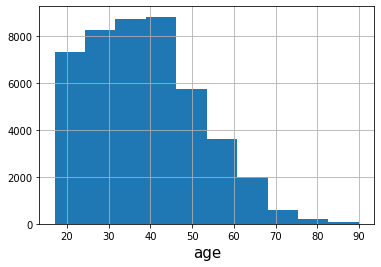

In [9]:
data['age'].hist()
plt.xlabel('age',fontsize=15);

#### "age" attribute is right-skewed,But this is totally fine as younger adult earn wages not the older ones.

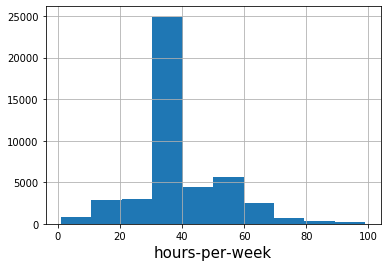

In [10]:
data['hours-per-week'].hist()
plt.xlabel('hours-per-week',fontsize=15);

#### Most people work 30-40 hours per week.75% of the people spend 45 or less working hours per week

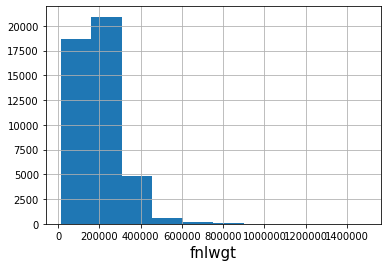

In [11]:
data['fnlwgt'].hist()
plt.xlabel('fnlwgt',fontsize=15);

#### This is the sampling weight corresponding to the observations and distribution seems to be rightly skewed.

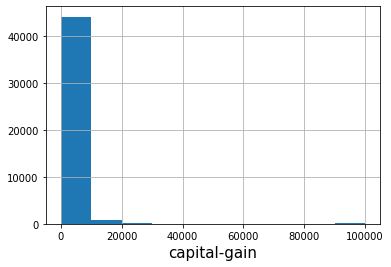

In [12]:
data["capital-gain"].hist()
plt.xlabel("capital-gain",fontsize=15);

#### This histogram shows that most of the "capital-gain" values are centered on 0 and shows that either a person has no gain or has gain of very large amount(10k or 99k).

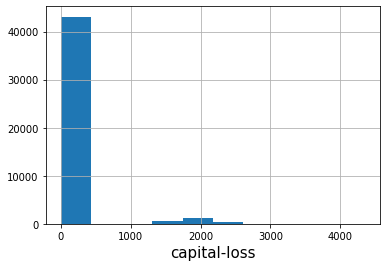

In [13]:
data["capital-loss"].hist()
plt.xlabel("capital-loss",fontsize=15);

#### his histogram shows that most of the "capital-loss" values are centered on 0.

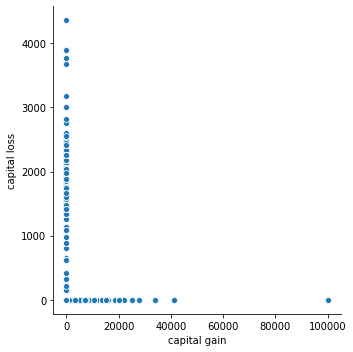

In [14]:
sns.relplot('capital-gain','capital-loss', data= data)
plt.xlabel("capital gain")
plt.ylabel("capital loss");

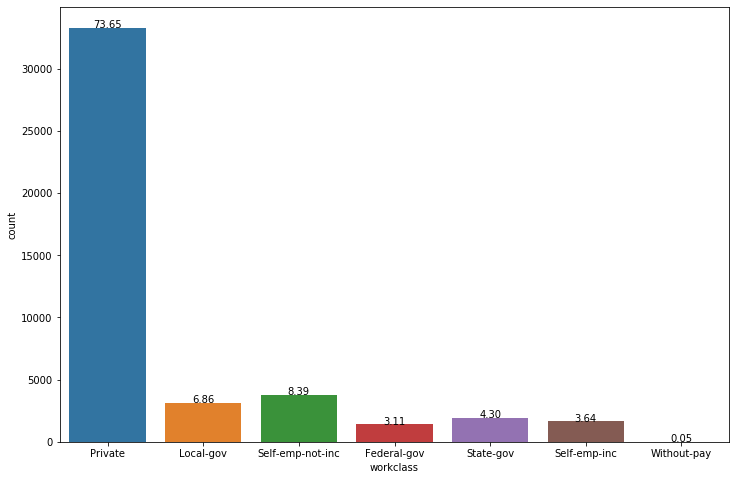

In [16]:
plt.figure(figsize=(12,8))

total = float(len(data["income"]))

ax = sns.countplot(x="workclass", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center")
plt.show();

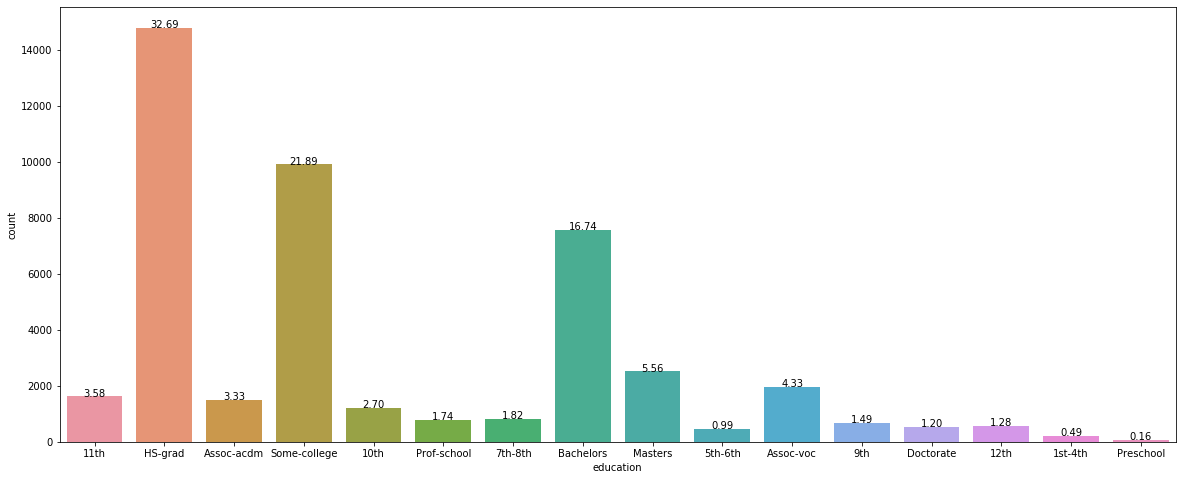

In [15]:
plt.figure(figsize=(20,8))
total = float(len(data["income"]) )

ax = sns.countplot(x="education", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show();

#### HS-grad (15784) has the maximum number of observations followed by some-college(10878) and Bachelors(8025). Pre-school has minimum samples (83).

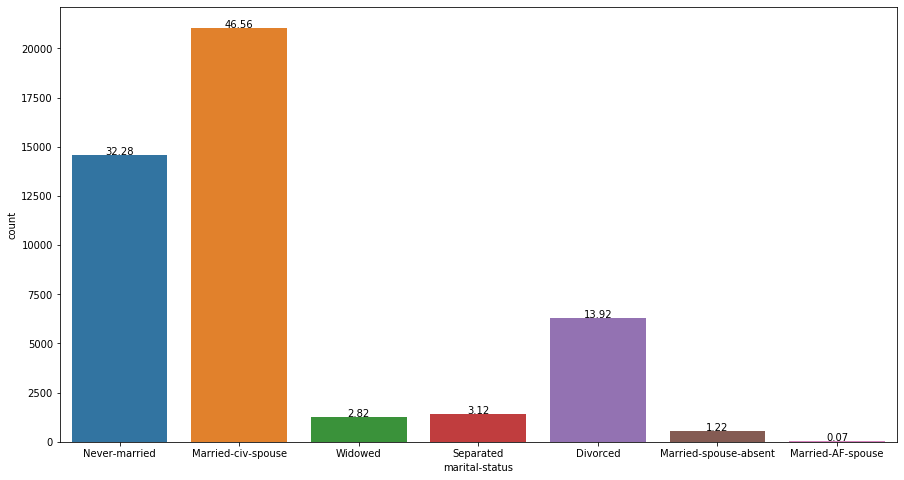

In [16]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="marital-status", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show();

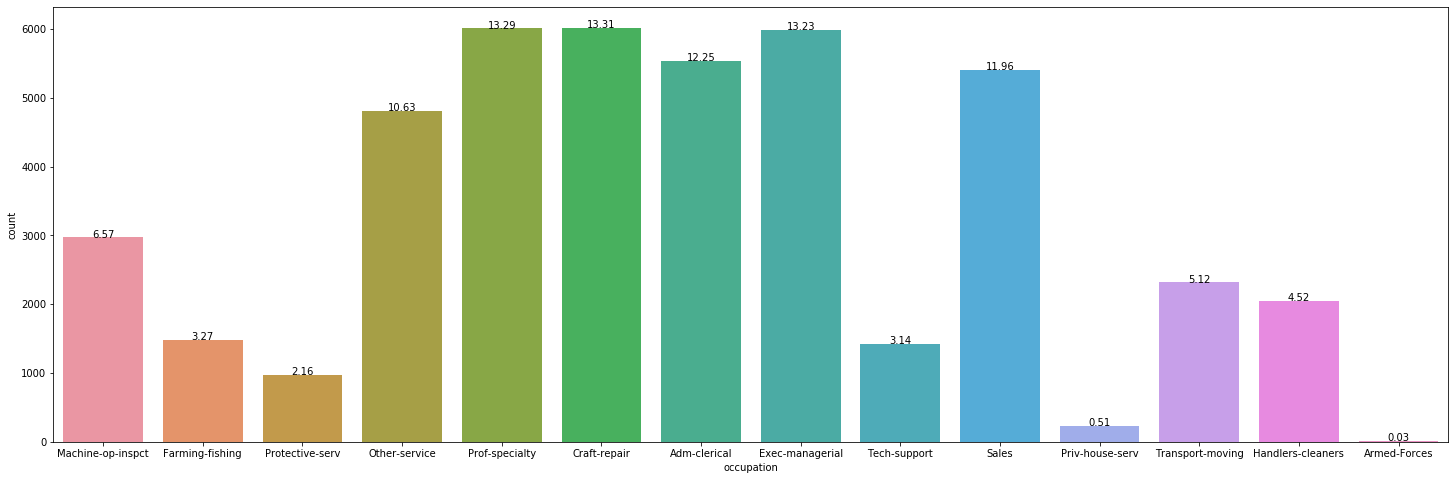

In [17]:
plt.figure(figsize=(25,8))
total = float(len(data) )

ax = sns.countplot(x="occupation", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show();

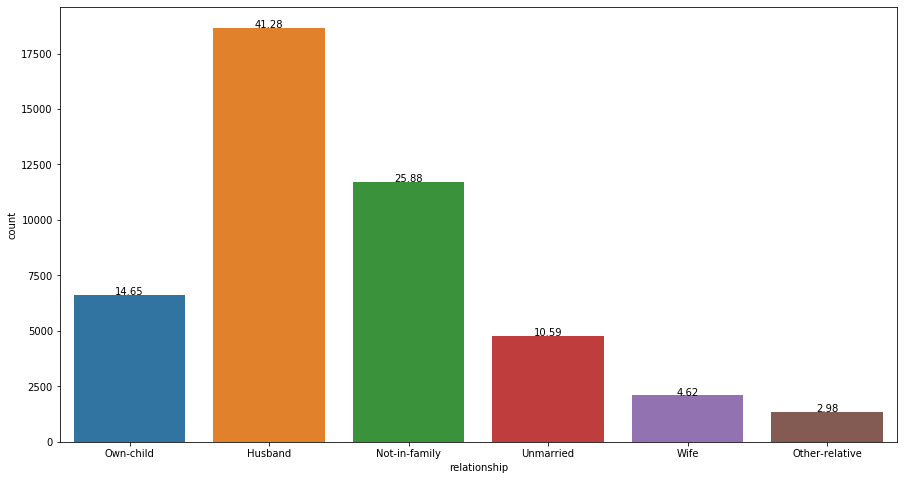

In [18]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="relationship", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show();

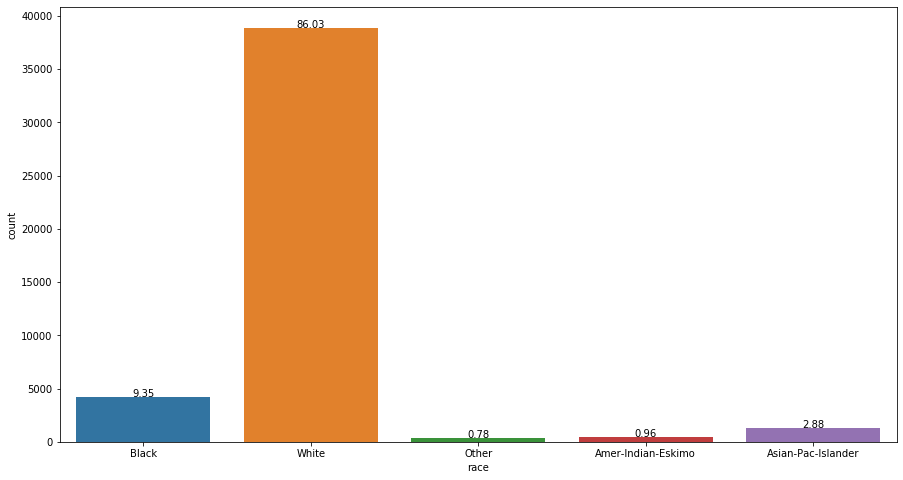

In [20]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x="race", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show();

#### Most of them are "white" which is roughly 85.50%.This dataset is totally bias toward the "white" race.

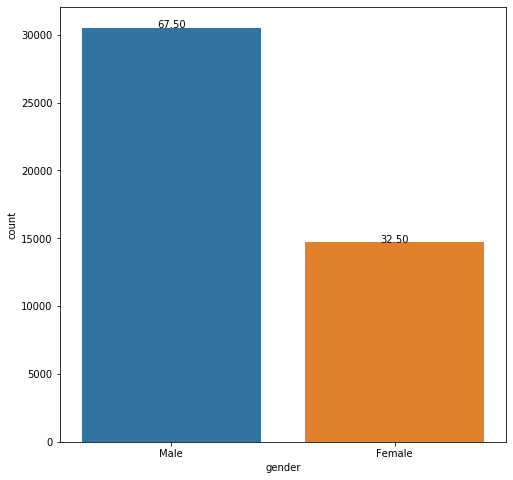

In [21]:
plt.figure(figsize=(8,8))
total = float(len(data) )

ax = sns.countplot(x="gender", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show();

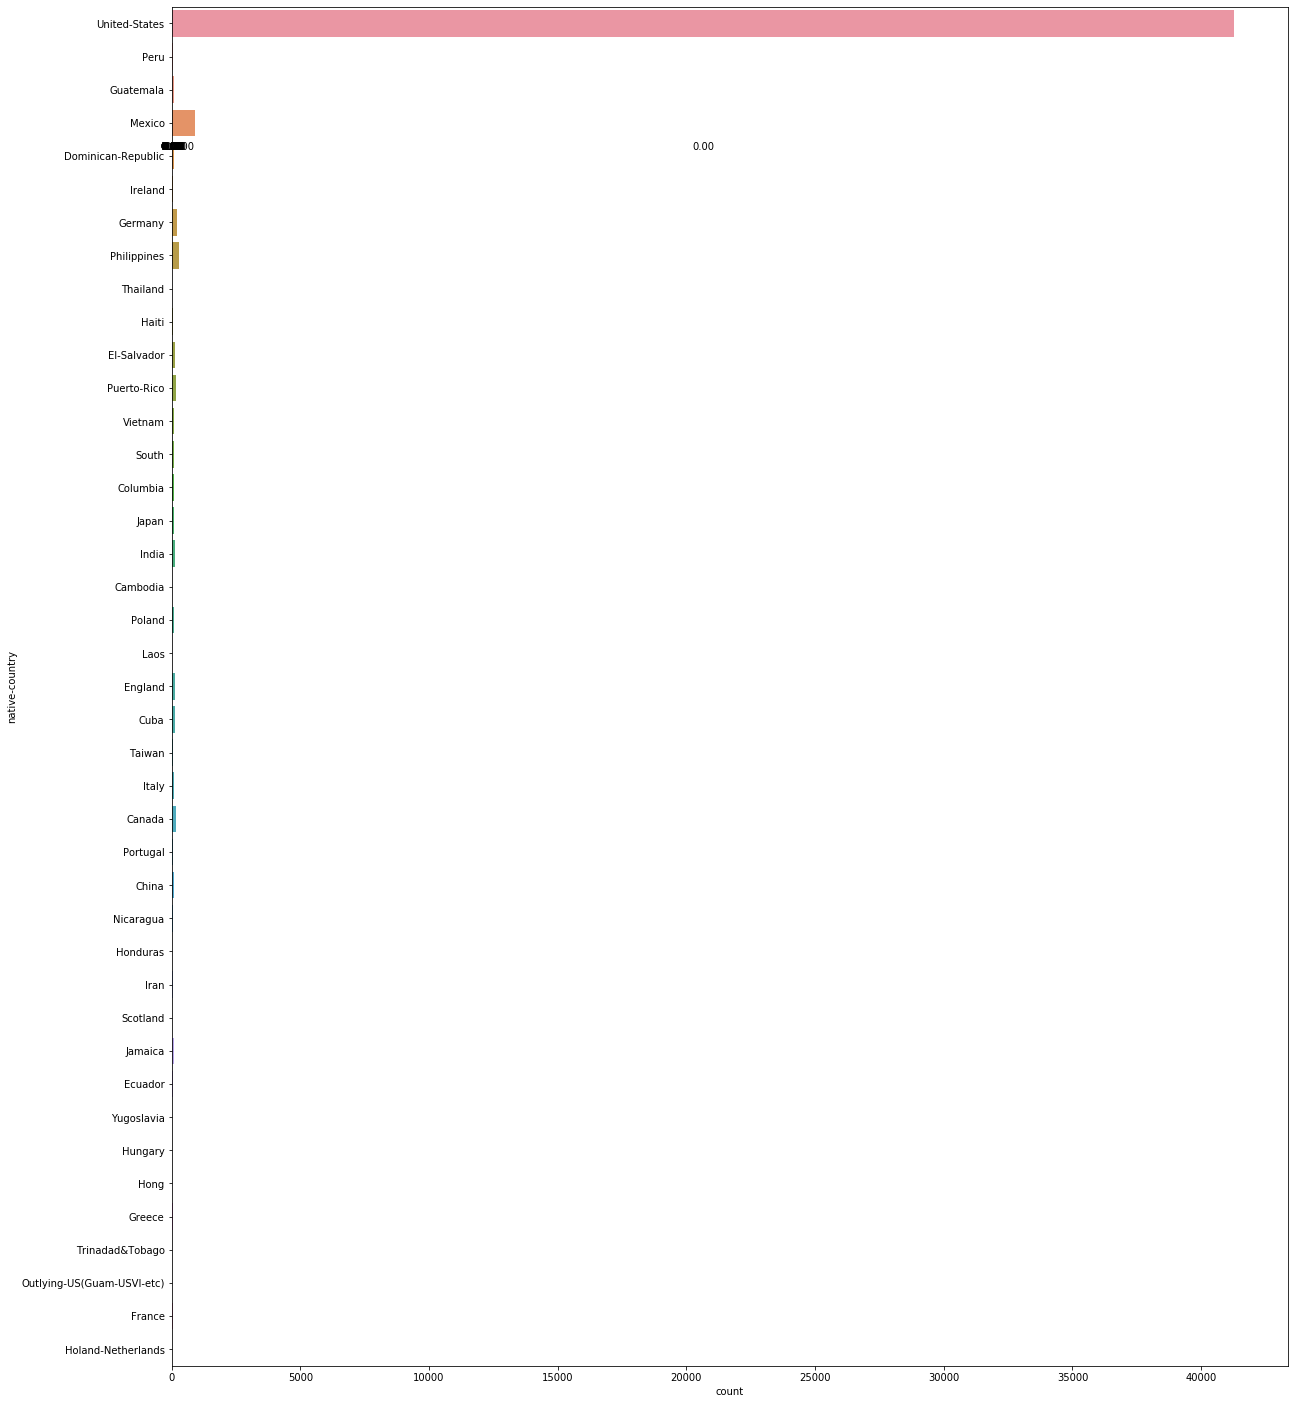

In [24]:
plt.figure(figsize=(20,25))
total = float(len(data) )

ax = sns.countplot(y="native-country", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show();

#### This dataset is taken from the US.As 91.5% of them have native country America and others are immigrants.


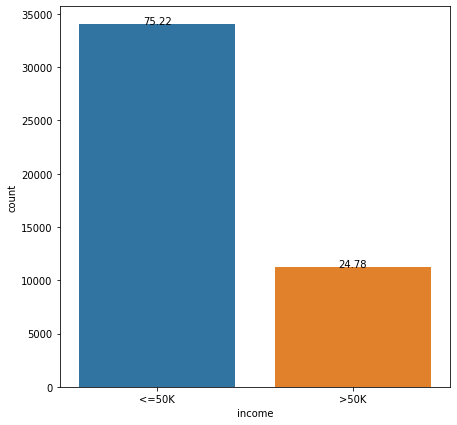

In [25]:
plt.figure(figsize=(7,7))
total = float(len(data) )

ax = sns.countplot(x="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show();

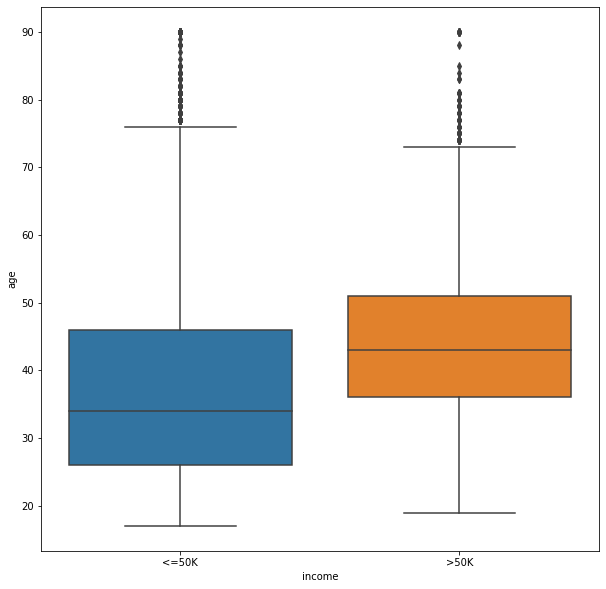

In [26]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="age", data=data);

#### The mean "age" for Income group(<=50k) is 36.8 years and for Income group(>50k) is 44.2 years.

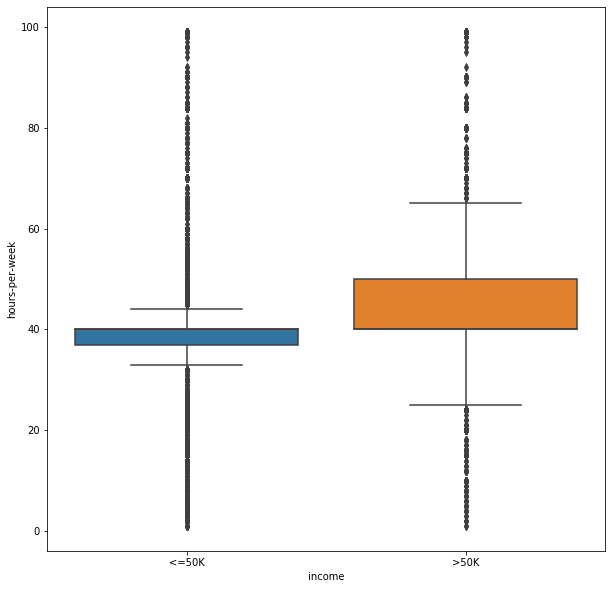

In [27]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="hours-per-week", data=data);

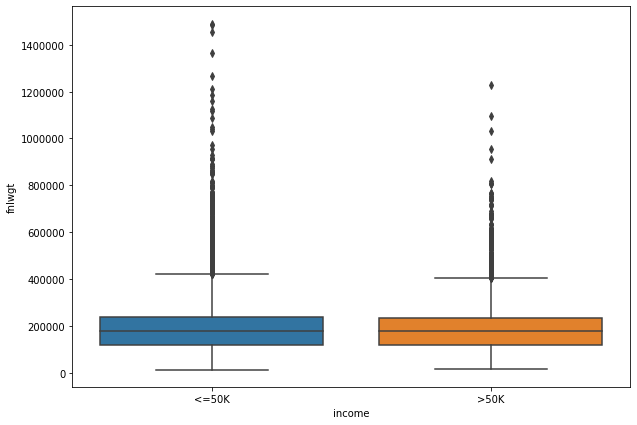

In [28]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="fnlwgt", data=data);

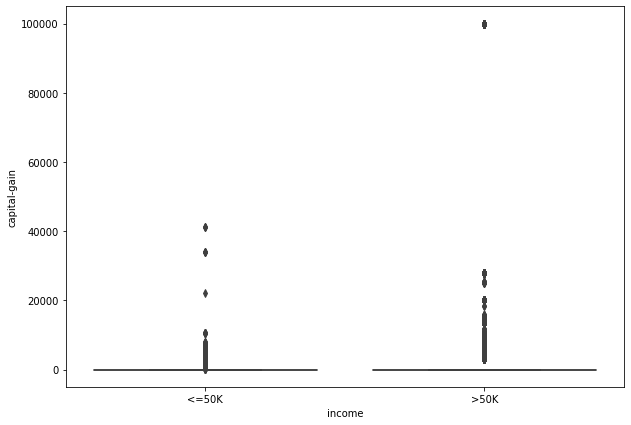

In [29]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="capital-gain", data=data);

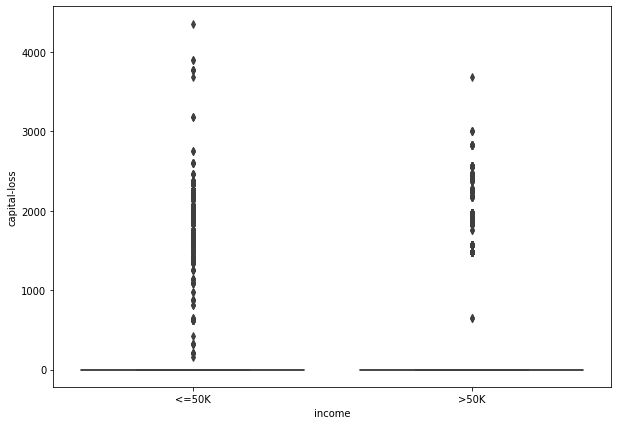

In [30]:
plt.figure(figsize=(10,7))
sns.boxplot(x="income", y="capital-loss", data=data);

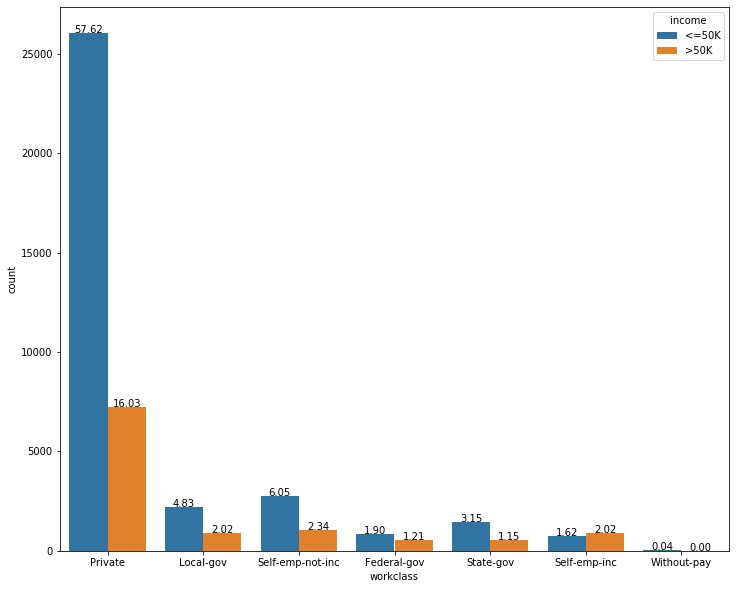

In [31]:
plt.figure(figsize=(12,10))
total = float(len(data["income"]) )

ax = sns.countplot(x="workclass", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show();

#### In private workclass most of the people(59.48%) earn <=50k.self-emp-inc workclass is only where more people earn >50k.

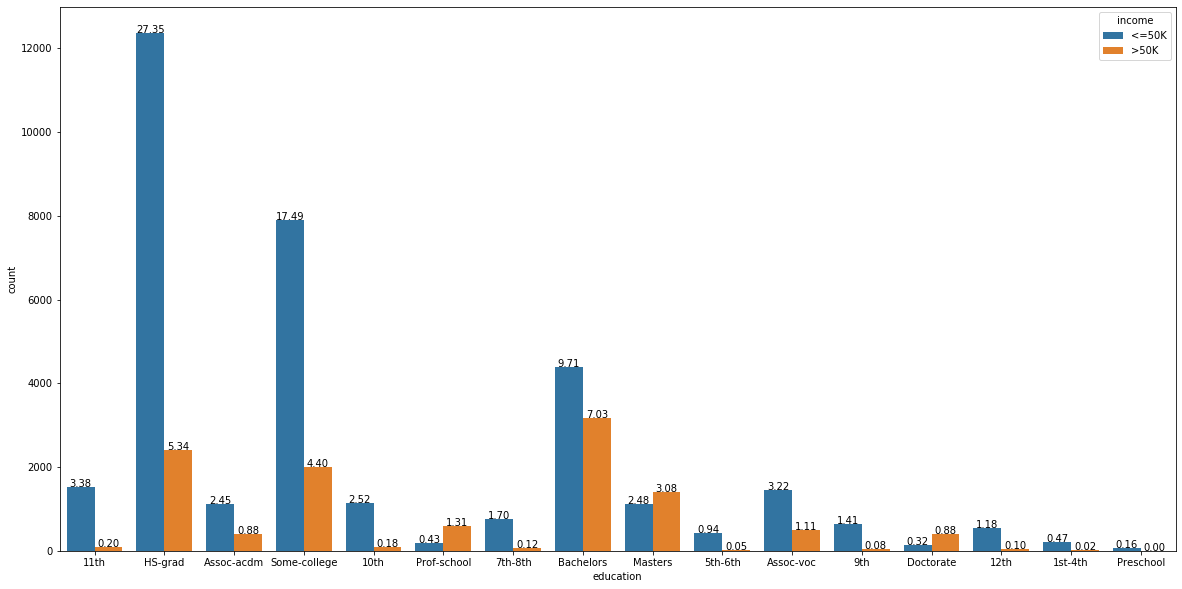

In [32]:
plt.figure(figsize=(20,10))
total = float(len(data["income"]) )

ax = sns.countplot(x="education", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show();

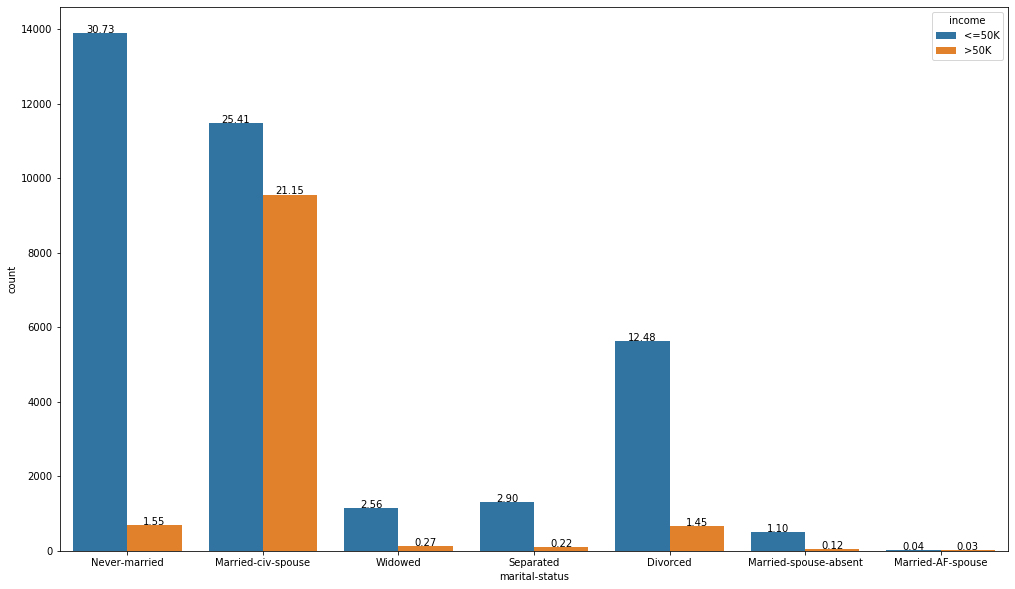

In [33]:
plt.figure(figsize=(17,10))
total = float(len(data) )

ax = sns.countplot(x="marital-status", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show();

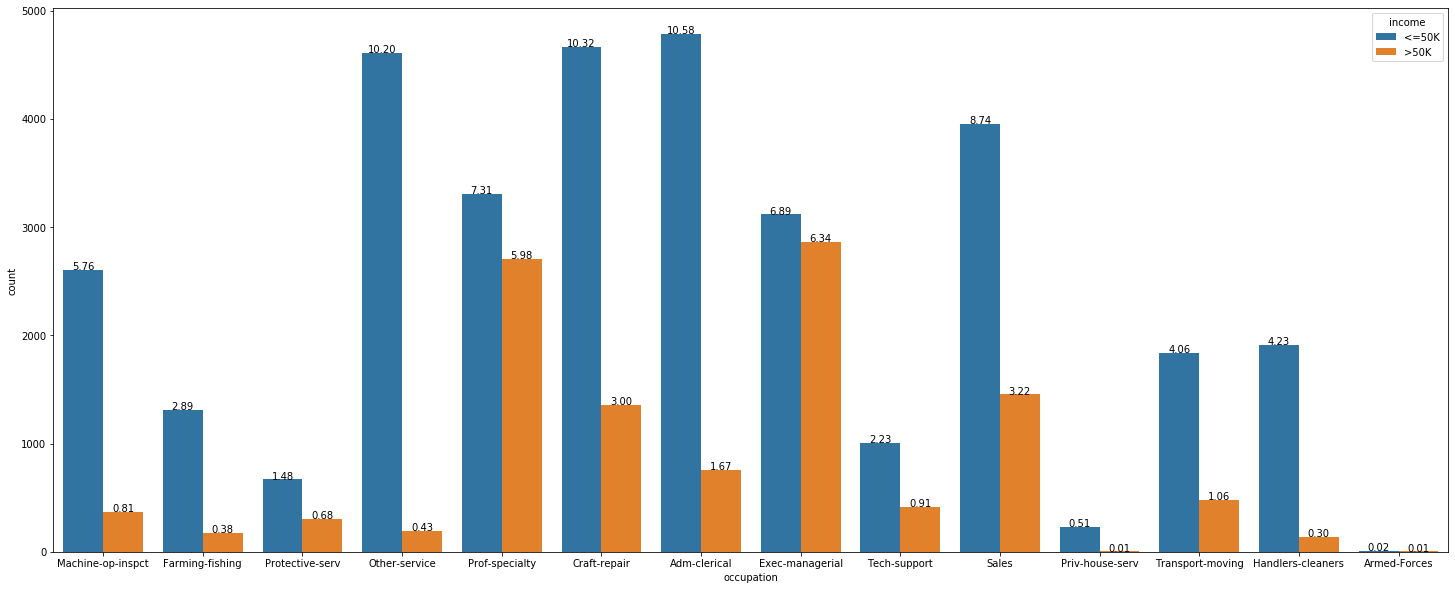

In [34]:
plt.figure(figsize=(25,10))
total = float(len(data) )

ax = sns.countplot(x="occupation", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show();

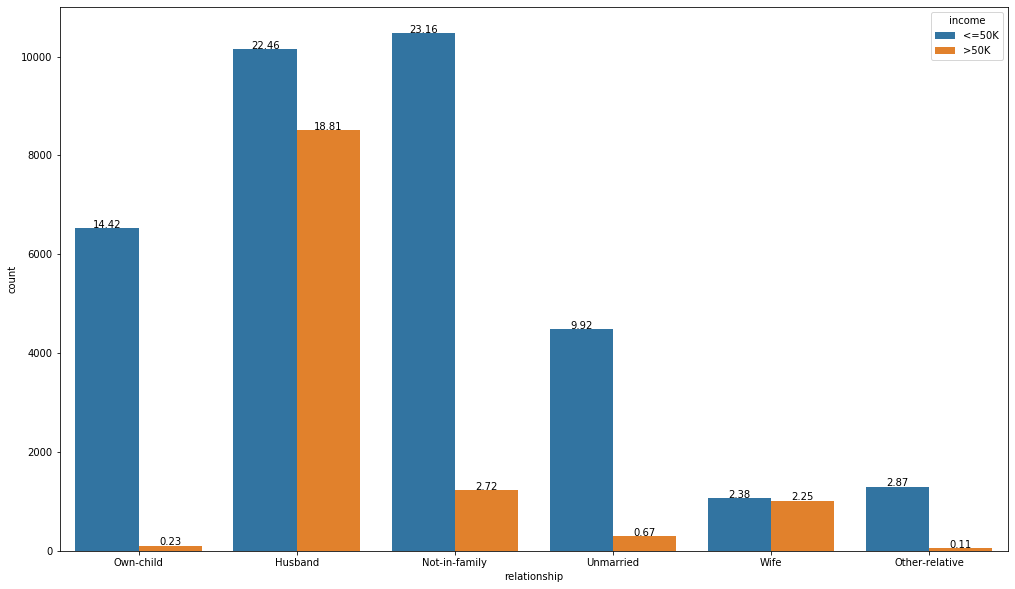

In [35]:
plt.figure(figsize=(17,10))
total = float(len(data))

ax = sns.countplot(x="relationship", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show();

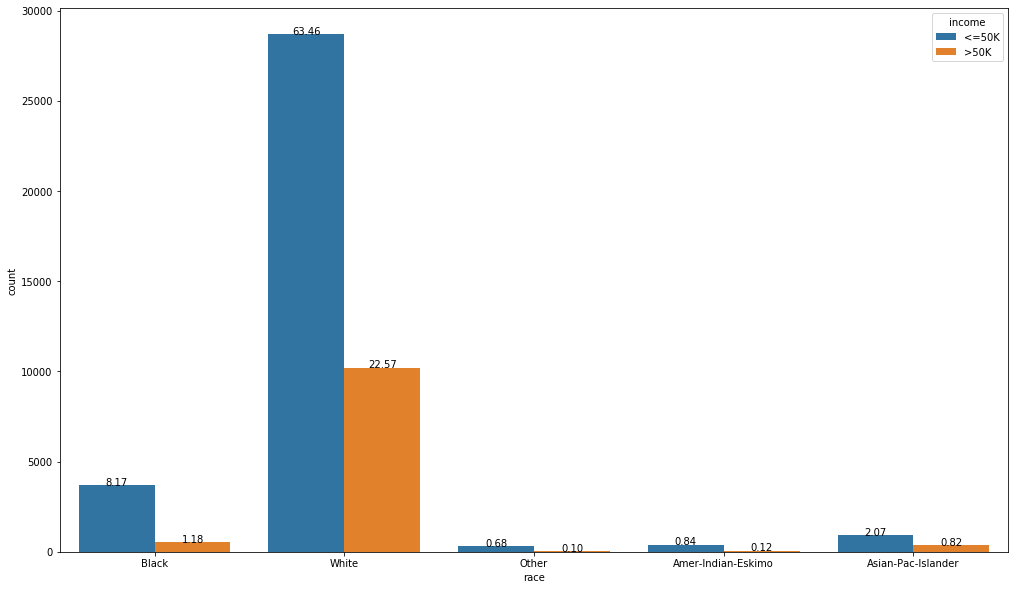

In [37]:
plt.figure(figsize=(17,10))
total = float(len(data) )

ax = sns.countplot(x="race", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show();

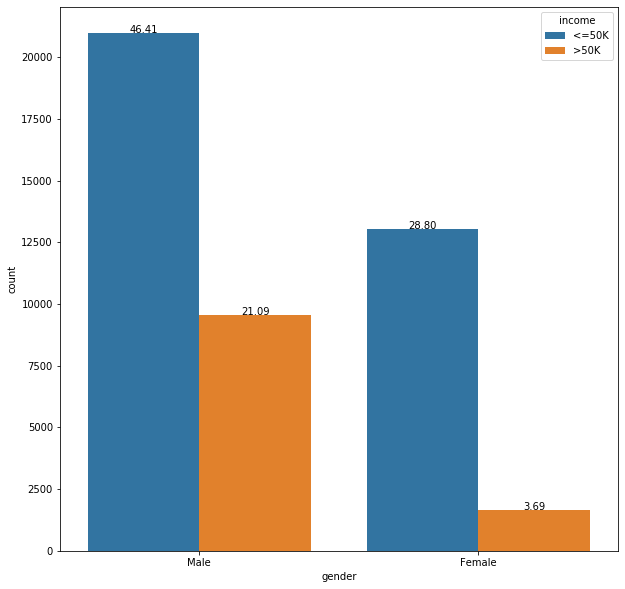

In [38]:
plt.figure(figsize=(10,10))
total = float(len(data) )

ax = sns.countplot(x="gender", hue="income", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show();

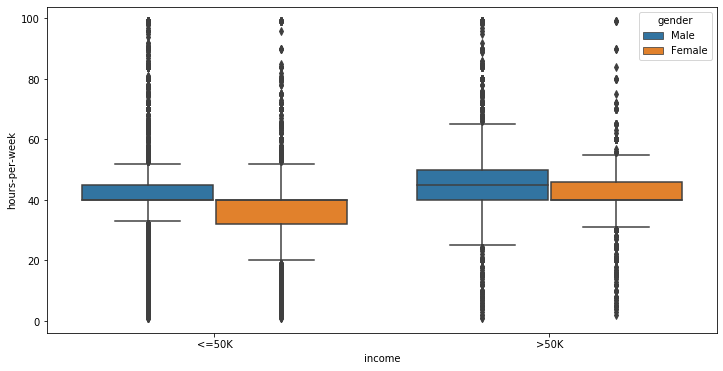

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(x='income',y ='hours-per-week', hue='gender',data=data);

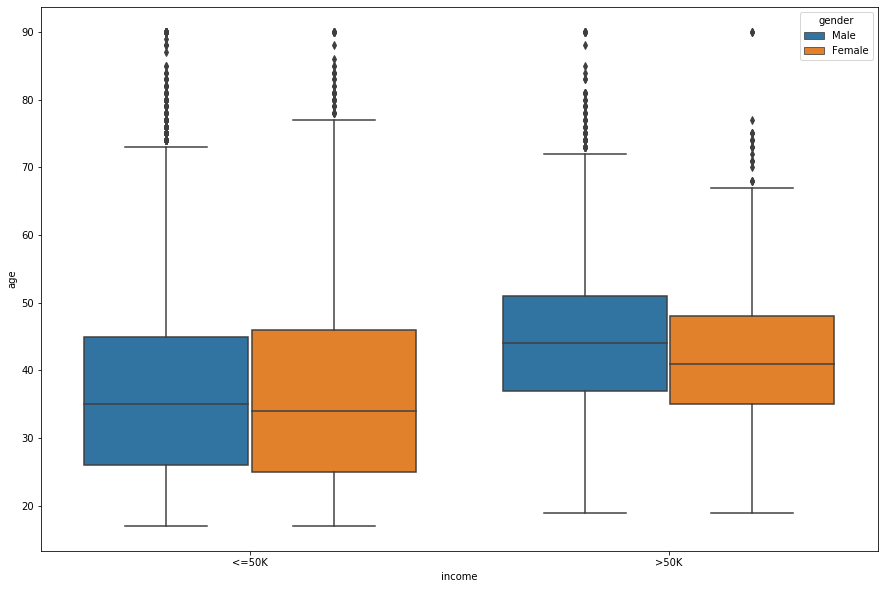

In [40]:
plt.figure(figsize=(15,10))
sns.boxplot(x="income", y="age",hue="gender",data=data);

### Feature Engineering

In [17]:
# encoding categorical features into numerical
for feature in data:
    if data[feature].dtype== 'object':
        data[feature]=pd.Categorical(data[feature]).codes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 15 columns):
age                45222 non-null int64
workclass          45222 non-null int8
fnlwgt             45222 non-null int64
education          45222 non-null int8
educational-num    45222 non-null int64
marital-status     45222 non-null int8
occupation         45222 non-null int8
relationship       45222 non-null int8
race               45222 non-null int8
gender             45222 non-null int8
capital-gain       45222 non-null int64
capital-loss       45222 non-null int64
hours-per-week     45222 non-null int64
native-country     45222 non-null int8
income             45222 non-null int8
dtypes: int64(6), int8(9)
memory usage: 4.1 MB


In [18]:
data.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0
7,63,4,104626,14,15,2,9,0,4,1,3103,0,32,38,1
8,24,2,369667,15,10,4,7,4,4,0,0,0,40,38,0
9,55,2,104996,5,4,2,2,0,4,1,0,0,10,38,0
10,65,2,184454,11,9,2,6,0,4,1,6418,0,40,38,1
11,36,0,212465,9,13,2,0,0,4,1,0,0,40,38,0


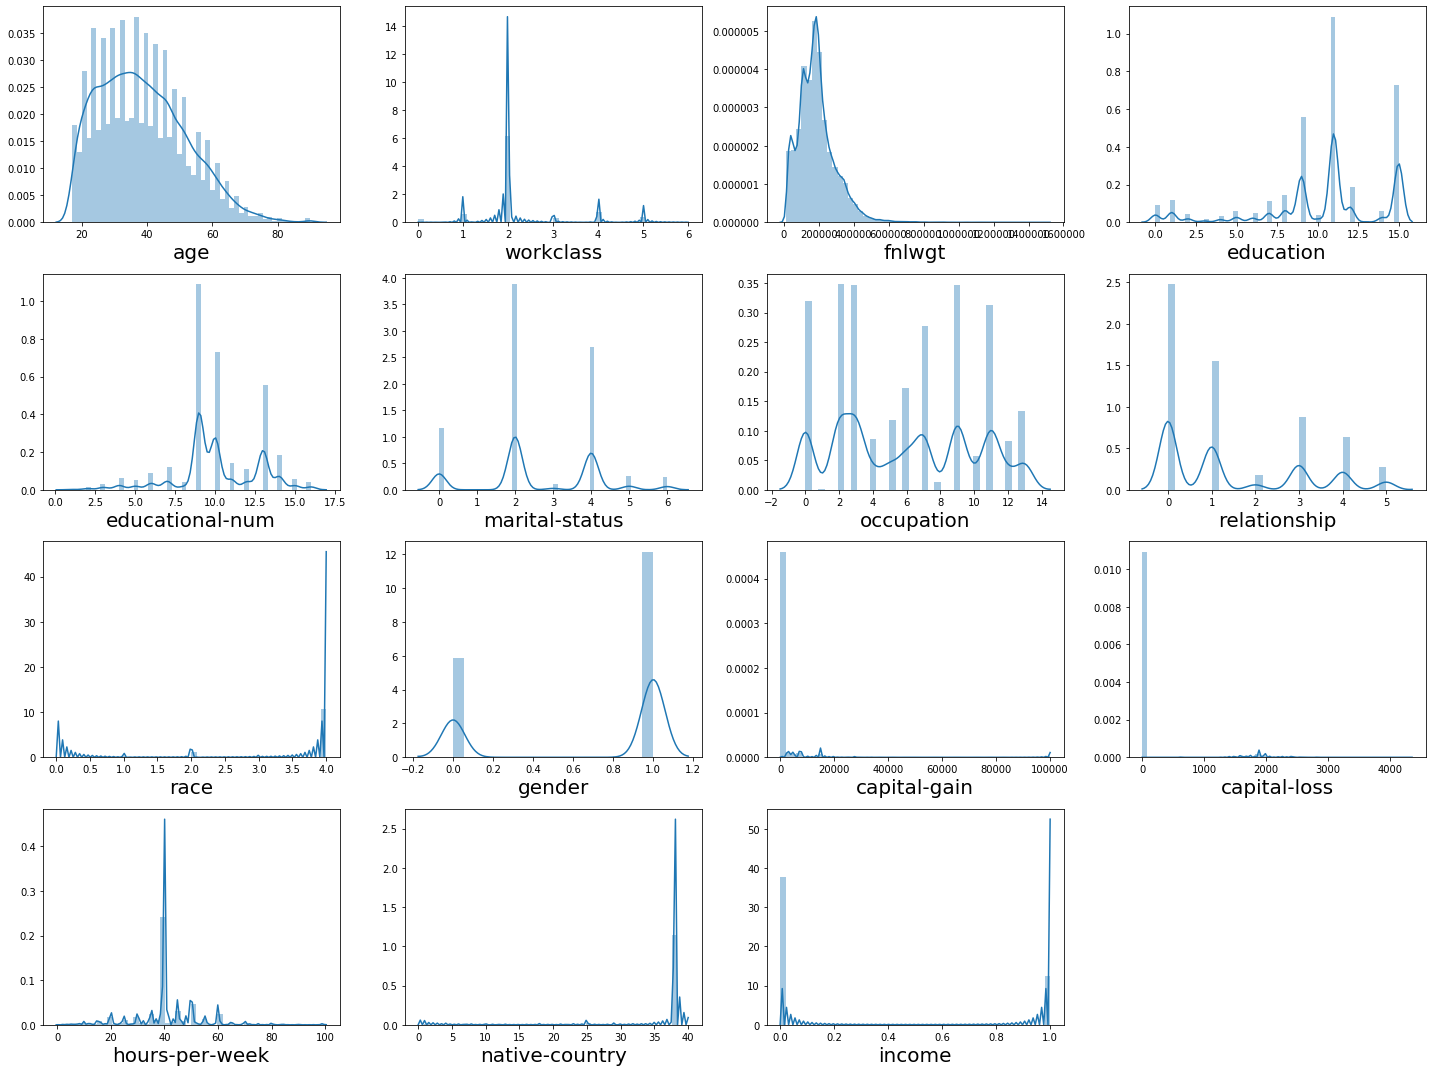

In [19]:
# plotting the distributions of each column
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for feature in data:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[feature])
        plt.xlabel(feature,fontsize=20)
    plotnumber+=1
plt.tight_layout();

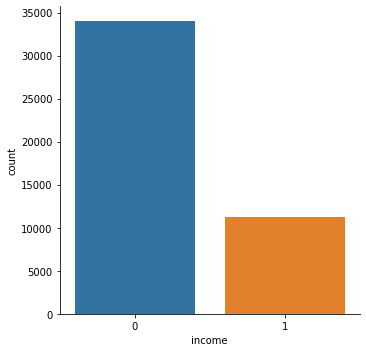

In [20]:
sns.catplot('income',data=data,kind='count');  # checking how imbalance the dataset is by using the target column.

#### looks like our dataset is imbalanced.we need to balance the dataset by using random sampling.otherwise our model might be biased towards one class.

In [21]:
# seperating feature and target columns
X=data.drop(columns='income')
y=data['income']

In [22]:
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 34014, 1: 11208})


In [23]:
ros=RandomOverSampler(random_state=0)  # balancing the dataset
X_res,y_res=ros.fit_resample(X,y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 34014, 1: 34014})


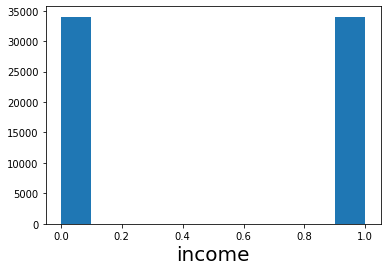

In [24]:
plt.hist(y_res)
plt.xlabel('income',fontsize=20);

In [25]:
new_X_data=pd.DataFrame(X_res,columns=X.columns)
new_X_data
new_y_data=pd.DataFrame(y_res)
new_y_data.rename(columns={0:'income'},inplace=True)
new_y_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38
4,34,2,198693,0,6,4,7,1,4,1,0,0,30,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68023,63,4,344128,9,13,2,11,0,4,1,0,0,50,38
68024,31,1,158291,9,13,4,2,1,4,1,8614,0,40,38
68025,57,2,104724,11,9,2,13,0,4,1,0,0,40,38
68026,48,2,119471,10,16,2,9,0,1,1,0,0,40,18


,income
0,0
1,0
2,1
3,1
4,0
...,...
68023,1
68024,1
68025,1
68026,1


In [26]:
new_data=[new_X_data,new_y_data]
res_data=pd.concat(new_data,sort=False,axis=1)
res_data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
4,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68023,63,4,344128,9,13,2,11,0,4,1,0,0,50,38,1
68024,31,1,158291,9,13,4,2,1,4,1,8614,0,40,38,1
68025,57,2,104724,11,9,2,13,0,4,1,0,0,40,38,1
68026,48,2,119471,10,16,2,9,0,1,1,0,0,40,18,1


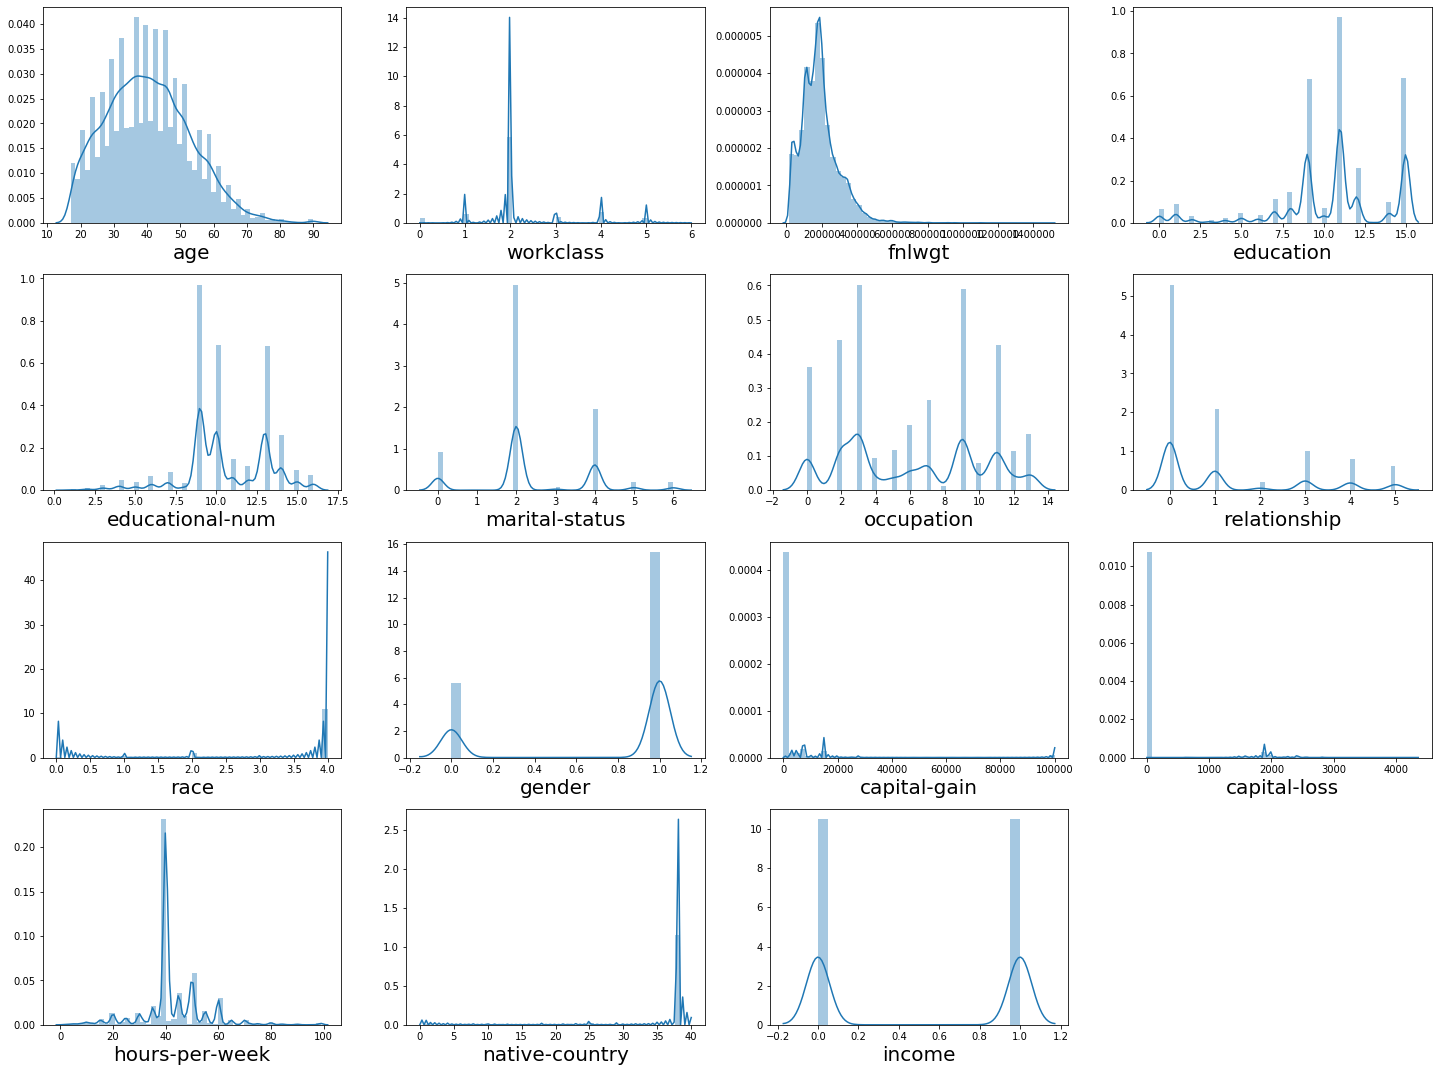

In [27]:
# plotting the distributions of each column
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for feature in res_data:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(res_data[feature])
        plt.xlabel(feature,fontsize=20)
    plotnumber+=1
plt.tight_layout();

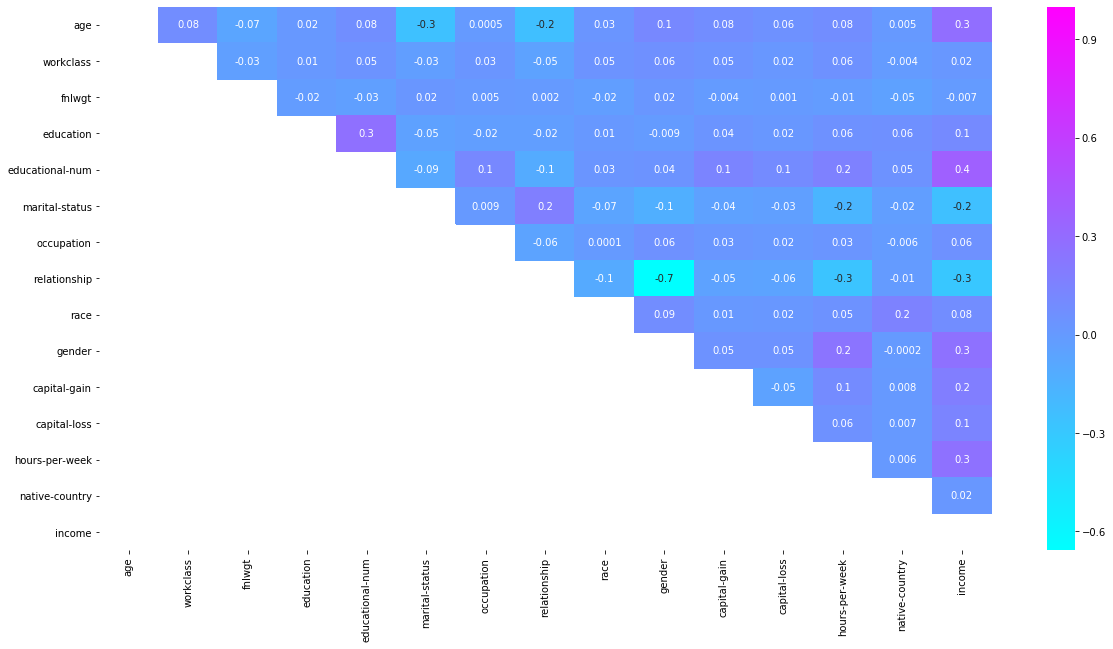

In [28]:
mask=np.tril(res_data.corr())
plt.figure(figsize=(20,10))
sns.heatmap(res_data.corr(),cmap='cool',mask=mask,annot=True,fmt='.1g');

#### There is no strong correlation among the numeric attributes.There is neither strong positive nor strong negative correlation present in any variable .

In [29]:
x=res_data.drop(columns='income')
y=res_data['income']

In [30]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [31]:
# Calculating variance inflation factor of feature variables to check for multicolinearity.

variables=x_scaled
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables,i) for i in range(x_scaled.shape[1])]
vif['Features']=x.columns
vif

,VIF,Features
0,1.138919,age
1,1.016501,workclass
2,1.009994,fnlwgt
3,1.088531,education
4,1.163652,educational-num
5,1.110746,marital-status
6,1.021389,occupation
7,1.903563,relationship
8,1.041244,race
9,1.798251,gender


### model training

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=42)

In [33]:
xgb_clf=XGBClassifier(objective='binary:logistic')
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [34]:
# cheking training accuracy
y_pred = xgb_clf.predict(x_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

0.8362047000254798

In [35]:
# cheking initial test accuracy
y_pred = xgb_clf.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8411242429587816

In [36]:
# Now to increae the accuracy of the model, we'll do hyperparameter tuning using grid search
param_grid={
   
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,10,20],
    'n_estimators':[10,50,100,200]
    
}
grid= GridSearchCV(XGBClassifier(objective='binary:logistic'),param_grid, verbose=3,n_jobs=-1)
grid.fit(x_train,y_train)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  5.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={' learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators'

In [37]:
# To  find the parameters givingmaximum accuracy
grid.best_params_

{' learning_rate': 1, 'max_depth': 20, 'n_estimators': 200}

In [38]:
# Create new model using the same parameters
xgb_clf1=XGBClassifier(learning_rate= 1, max_depth= 20, n_estimators= 200)
xgb_clf1.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=20, min_child_weight=1, missing=None,
              n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [39]:
# cheking training accuracy
y_pred = xgb_clf1.predict(x_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

0.9999216009094295

In [40]:
# cheking test accuracy
y_pred = xgb_clf1.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.9270888457693891

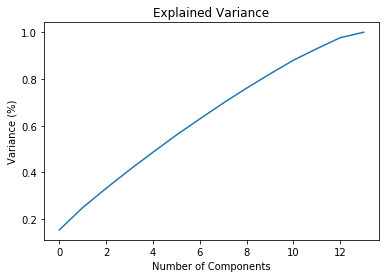

In [41]:
# let's use PCA for feature selection and see if it improves our accuracy
pca = PCA()
principalComponents = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance');

#### We can see that around 95% of the variance is being explained by 12 components. So instead of giving all 14 columns as input in our algorithm let's use these 12 principal components instead.

In [42]:
# creating principal components

pca = PCA(n_components=12)
new_data = pca.fit_transform(x_scaled)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11','PC-12'])
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11,PC-12
0,2.162043,2.486148,0.836753,-0.196034,0.594391,0.371215,-0.400173,0.033509,1.100970,-0.002343,-1.998555,-0.034912
1,-0.792705,0.543364,-0.845298,-0.042690,-0.021046,-0.474496,-0.748181,-0.713427,0.120835,0.437438,-0.030149,-0.250121
2,-0.310733,0.900593,0.525186,-1.638750,0.060542,-0.436390,-0.084191,1.632183,-0.170540,0.210668,0.034062,-0.302636
3,-0.593941,-0.200943,1.082331,0.660738,-0.194276,-0.820736,-0.889803,-0.508343,-0.452424,-1.245483,-1.196017,-0.759148
4,1.310570,3.008912,-0.870035,-0.638847,1.084200,0.854074,-0.143720,0.546383,0.946296,-0.468509,-0.106208,0.103786
...,...,...,...,...,...,...,...,...,...,...,...,...
68023,-2.019807,0.053139,0.385939,0.125049,0.769385,1.183970,1.596211,0.771339,-1.231764,-0.251614,-0.479863,1.244752
68024,0.236896,-0.052188,-0.095108,-1.030099,0.212663,-1.106770,-0.690286,-0.418687,1.302165,-0.512447,0.513733,0.372060
68025,-1.131471,0.425457,-0.468607,0.214376,0.512936,0.929549,-1.179951,0.898091,-0.896209,-0.574161,0.286259,0.109216
68026,-0.690560,0.221404,3.956235,2.027293,-0.687380,0.419963,-1.715737,-0.559535,-0.741432,-0.464094,0.144336,0.095467


In [43]:
# training our model on new data

x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.25, random_state= 42)
xgb_clf2=XGBClassifier(objective='binary:logistic')
xgb_clf2.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
# cheking training accuracy
y_pred = xgb_clf2.predict(x_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

0.8055702553850376

In [45]:
# cheking test accuracy
y_pred = xgb_clf2.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.8063150467454577

In [46]:
# tarining the new model with tuned hyperparameters
xgb_clf3=XGBClassifier(learning_rate= 1, max_depth= 20, n_estimators= 200)
xgb_clf3.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=20, min_child_weight=1, missing=None,
              n_estimators=200, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [47]:
# cheking training accuracy
y_pred = xgb_clf3.predict(x_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

0.9999216009094295

In [48]:
# cheking test accuracy
y_pred = xgb_clf3.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.917092961721644